# NBA Shooting Data
### Jason Pollock

## Introduction
Who are the best shooters in the NBA? This tutorial is going to examine NBA shooting data from the 2014-2015 season and try to answer this question using data science techniques. In addition, this tutorial will show you how you can use machine learning to predict whether or not a shot will go in.

Talk about using two datasets because the first one needed cleaning.

## Outline
<ol>
<li>Gather data</li>
<li>Tidy the data</li>
<li>Exploratory Data Analysis</li>
<li>Machine Learning</li>
</ol>
## Required Tools
You will need Python 3.5 and the following libraries:
<ul>
<li>pandas</li>
<li>seaborn (for visualization)</li>
</ul>
The last thing you need is the dataset which can be found at https://www.kaggle.com/dansbecker/nba-shot-logs/data
## Motivation
Using data science and analytic techniques to come up with a new way to look at NBA shooting data. Also, using this data and applying it to machine learning.

<a id='section1'></a>
## 1. Gathering the data
The first thing you are going to need to do is download the dataset from https://www.kaggle.com/dansbecker/nba-shot-logs/data. This dataset is a CSV (comma seperated values) file and can be read using the pandas library. When pandas reads the CSV file, it will create a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). This is basically just a table of the data.

If you would like to learn more about pandas, [click here](http://pandas.pydata.org/pandas-docs/stable/).

In [1]:
#look at clutch players
#do players shoot better in certain quarters
#predicting salaries based on shooting
#Data on shots taken during the 2014-2015 season,

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import warnings
from scipy import stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#load data into dataframe
shots_df = pd.read_csv("shot_logs2.csv")
#print out first 5 rows of the data
shots_df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


### 1.1 Quick look at the data
Now we have a pandas data frame called shots_df. Here we can see some of the basic features of our data, such as shot number, game clock, shot distance, and whether or not the player made the shot. There are many other features and we will discuss in the next section what we are going to do with them. Missing data is indicated as NaN.

## 2. Tidying our data
In tidy data:
<ul>
<li>Each variable forms a column.</li>
<li>Each observation forms a row</li>
<li>Each type of observational unit forms a table.</li>
</ul>
If you would like to learn more about tidy data, please [click here](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf) (Note: this is a link to a pdf download)

This data is pretty tidy already. Each variable is in fact a column and each observation is a row. To clean it up a little more, we are going to drop some columns that we don't need. This is just going to help us when we are looking at the the whole dataframe. 

In [4]:
#tidying data
#add shot type for later
#get rid of missing data nan
#fix shot_clock nan with game clock

#this will remove, or drop, a column in our dataframe
shots_df = shots_df.drop('MATCHUP', axis=1)
shots_df = shots_df.drop('GAME_ID', axis=1)
shots_df = shots_df.drop('FINAL_MARGIN', axis=1)
shots_df = shots_df.drop('W', axis=1)
shots_df = shots_df.drop('LOCATION', axis=1)
shots_df.head()

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [5]:
cols = shots_df.columns.tolist()
cols = cols[-2:] + cols[:-2]
shots_df = shots_df[cols]
shots_df.head()

,player_name,player_id,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS
0,brian roberts,203148,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2
1,brian roberts,203148,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0
2,brian roberts,203148,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0
3,brian roberts,203148,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0
4,brian roberts,203148,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0


The next thing we want to do is replace the missing values indicated by NaN. We want to do this so we can use those rows for data analysis later on in the tutorial. We can see in the third row there is a NaN value in the SHOT_CLOCK column. Since the game clock was under 24 seconds when the team took control of the ball, the shot clock was turned off and therefore was reported as NaN. If you are unfamiliar with the shot clock rules in the NBA, you can read more about them [here](http://www.nba.com/analysis/rules_7.html?nav=ArticleList).

We will replace the missing shot clock data with the game clock time.

In [6]:
for row, shots in shots_df.iterrows():
    if math.isnan(shots['SHOT_CLOCK']):
        #set shot clock to the game clock seconds time
        shots_df.set_value(row, 'SHOT_CLOCK', shots['GAME_CLOCK'].split(':')[1])
shots_df.head()

,player_name,player_id,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS
0,brian roberts,203148,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2
1,brian roberts,203148,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0
2,brian roberts,203148,3,1,0:00,0.0,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0
3,brian roberts,203148,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0
4,brian roberts,203148,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0


We can see that the third value in the shot clock column was replaced with 0.0.

The next bit of tidying we want to do is changing the data type of the game clock so we can use this later on in the machine learning section. Currently, the game clock column is a string type. We want it as a number so we will convert it to seconds. Again, we will see later on why this is necessary.

In [7]:
#to convert to seconds, we just split the string on the semi colon and do some basic math
shots_df['seconds'] = shots_df['GAME_CLOCK'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
shots_df['seconds'].head()

0     69
1     14
2      0
3    707
4    634
Name: seconds, dtype: int64

This last part of tidying is just adding another column so we can visualize the data later on. I will be creating a column to identify the type of shot that was taken.

In [8]:
shots_df.loc[(shots_df['PTS_TYPE']  == 3), 'SHOT_TYPE'] = 'Three'
shots_df.loc[(shots_df['SHOT_DIST'] >= 8) & (shots_df['SHOT_DIST']  <= 18) , 'SHOT_TYPE'] = 'Mid Range'
shots_df.loc[(shots_df['SHOT_DIST']  < 8), 'SHOT_TYPE'] = 'In the Paint Area'
shots_df.loc[(shots_df['SHOT_DIST'] > 18) & (shots_df['PTS_TYPE'] == 2) , 'SHOT_TYPE'] = 'Long Two'
shots_df.loc[(shots_df['SHOT_DIST']  < 2), 'SHOT_TYPE'] = 'Layup/Dunk'

## 3. Exploratory Data Analysis
Now that our data is nice and tidy, we can start performing analysis on it. The purpose of this analysis will be to get more information about general trends and patterns in our data so that we can make testable hypotheses. We will perform two kinds of analysis: visualization and statistical measures.

### 3.1 Basic NBA Statistics
Let's first look at some basic statics regarding the players with the highest field goal percentage. This will help us become more comfortable using dataframes and using the groupby method. We can groupby player name to get each players total made and missed field goals and then easily calculate their field goal percentage. By using the _size()_ method, we get the counts for each players made and missed since we are grouping by both player_name and SHOT_RESULT.

In [9]:
#groupby players and get the counts of made and missed field goals
shooters = shots_df.groupby(['player_name', 'SHOT_RESULT']).size().unstack(fill_value=0)
shooters['total'] = shooters['made'] + shooters['missed']
shooters['fg%'] = shooters['made'] / shooters['total']
shooters.sort('fg%', ascending=0).head()

SHOT_RESULT,made,missed,total,fg%
player_name,,,,
deandre jordan,280,113,393,0.712468
tyson chandler,230,110,340,0.676471
rudy gobert,167,100,267,0.625468
greg smith,29,18,47,0.617021
james johnson,191,120,311,0.614148


In [10]:
three_df = shots_df[shots_df['PTS_TYPE'] == 3]
three_df = three_df.groupby(['player_name', 'SHOT_RESULT']).size().unstack(fill_value=0)
three_df['total'] = three_df['made'] + three_df['missed']
three_df['fg%'] = three_df['made'] / three_df['total']
three_df = three_df[three_df['total'] > 100]
three_df.sort('fg%', ascending=0).head()

SHOT_RESULT,made,missed,total,fg%
player_name,,,,
luke babbitt,52,51,103,0.504854
kyle korver,176,179,355,0.495775
courtney lee,75,96,171,0.438596
klay thompson,177,230,407,0.434889
harrison barnes,67,88,155,0.432258


### 3.2 Finding trends in the data
Now we are going to see if we can find any interesting trends in our data by doing data visualization as well as looking at statistical information.

Remember the shot type column we added in section 2? Well, now we can plot it to see the distribution of shots players take in the NBA.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

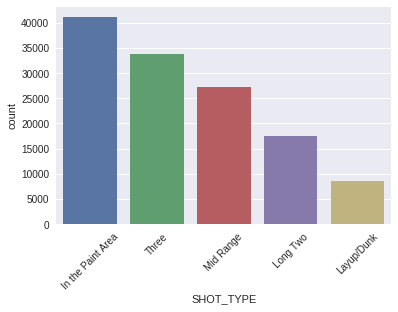

In [11]:
plot = sns.countplot(shots_df['SHOT_TYPE'])
plt.xticks(rotation=45)

This graph shows us that players take the majority of their shots within 8 feet of the basket, which is considered the paint area. Suprisingly, players take more long twos than mid range shots. One would think that since you are not taking a three point shot you would want to be as close to the basektball as possible to increase your chances of making the shot.

Now we can look at the percentages of each of these shots to see if the players shot selections make sense.

In [12]:
shot_type_df = shots_df.groupby(['SHOT_TYPE', 'SHOT_RESULT']).size().unstack(fill_value=0)
shot_type_df['total'] = shot_type_df['made'] + shot_type_df['missed']
shot_type_df['fg%'] = shot_type_df['made'] / shot_type_df['total']
shot_type_df.sort('fg%',ascending=0)

SHOT_RESULT,made,missed,total,fg%
SHOT_TYPE,,,,
Layup/Dunk,5469,3020,8489,0.644245
In the Paint Area,22634,18496,41130,0.550304
Mid Range,11130,16098,27228,0.408770
Long Two,6762,10636,17398,0.388665
Three,11910,21914,33824,0.352117


These percentages make sense, right? The closer you are to the basket, the easier it is to make the shot.

Next, we can take a look at the average points a player is going to score based on the shot he takes. This just means we are going multiply field goal percentage by 2 (or 3 for a three point shot) and this will give us the expected number of points per shot. We can use this number to see how effective players are shooting.

In [13]:
total = shot_type_df.total.sum()
shot_type_df['% taken'] = shot_type_df.total/total
shot_type_df['Points Per Shot'] = shot_type_df['fg%'] * 2
shot_type_df.loc['Three', 'Points Per Shot'] = shot_type_df.loc['Three']['fg%'] * 3
shot_type_df

SHOT_RESULT,made,missed,total,fg%,% taken,Points Per Shot
SHOT_TYPE,,,,,,
In the Paint Area,22634,18496,41130,0.550304,0.321155,1.100608
Layup/Dunk,5469,3020,8489,0.644245,0.066285,1.288491
Long Two,6762,10636,17398,0.388665,0.135849,0.777331
Mid Range,11130,16098,27228,0.408770,0.212604,0.817541
Three,11910,21914,33824,0.352117,0.264108,1.056351


To make these numbers easier to understand, we can plot Points Per Shot by the percentage that those shots are taken. 

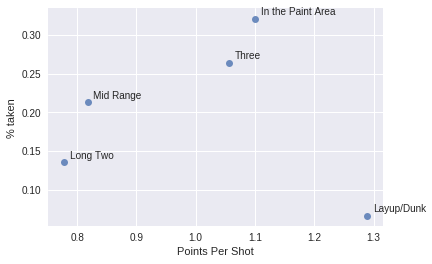

In [15]:
ax = sns.regplot(y='% taken', x='Points Per Shot', data=shot_type_df, fit_reg=False)
[ax.text(p[0], p[1], p[2]) for p in zip(shot_type_df['Points Per Shot']+.01, shot_type_df['% taken']+.005, shot_type_df.index.tolist())]
plt.show()

Looking at this graph, we notice that a layup or dunk is going to yield the most points per shot (PPS) since it has the highest field goal percentage. However, this is lowest percentage shot taken in the NBA. There could be a number of reasons for this but nonetheless, it is still the lowest percentage shot. Next, shots taken in the paint have the second highest PPS and are taken much more frequently than a layup or dunk. Right behind that is the three pointer. There is still some debate in the NBA on whether a three point shot is more effective than a two point jump shot. From our analysis, since a three point shot has a higher PPS than a long two or a mid range shot, I think the three pointer is much more effective for shooters who can shoot a high percentage from the three. This method of analysis could be used for each indivdual player to identify which type of shots they should shoot so they can become a more effective scorer.

We can take a look at a specific players PPS and the percetange of shots they take. Let's take a look at Stephen Curry, arguably one of the best shooters in the NBA. First we are going to make a new data frame that contains all the players field goal percentages like we did previously. The only difference now is that we are going to add an additional groupby column, player name.

In [19]:
players_shot_results_df = shots_df.groupby(['player_name', 'SHOT_TYPE', 'SHOT_RESULT']).size().unstack(fill_value=0)
players_shot_results_df['total'] = players_shot_results_df['made'] + players_shot_results_df['missed']
players_shot_results_df['fg%'] = players_shot_results_df['made'] / players_shot_results_df['total']

Below we are going to calculate the PPS as well and then plot it.

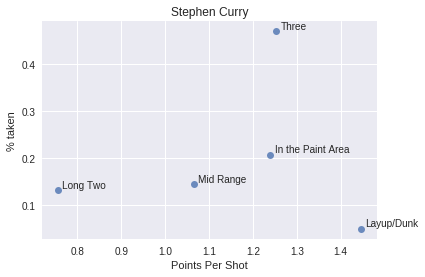

In [20]:
curry = players_shot_results_df.loc['stephen curry']
total = curry.total.sum()
curry['% taken'] = curry.total/total
curry['Points Per Shot'] = curry['fg%'] * 2
curry.loc['Three', 'Points Per Shot'] = curry.loc['Three']['fg%'] * 3
ax = sns.regplot(y='% taken', x='Points Per Shot', data=curry, fit_reg=False)
[ax.text(p[0], p[1], p[2]) for p in zip(curry['Points Per Shot']+.01, curry['% taken']+.005, curry.index.tolist())]
plt.title('Stephen Curry')
plt.show()

First of all, Stephen Curry takes almost 50% of his shots from behind the three point line. Since Steph is such a small player in relation to many other players in the NBA, this makes sense. His ability to shoot the three pointer at a high percentage allows him to have the same PPS as a shot in the paint area (less than 8 feet away from the basket).

We can also look at Lebron James, another one of the best basketball players in the NBA. The difference between Lebron and Steph is that Lebron James is a much bigger and physical player. Therefore, he takes more of his shots closer to the basketball instead of shooting the three.

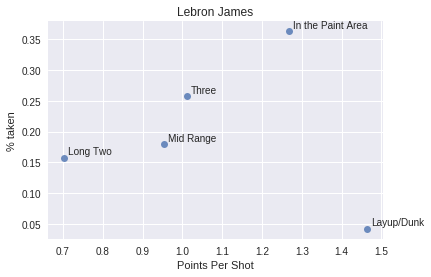

In [21]:
lebron = new_shots_df.loc['lebron james']
total = lebron.total.sum()
lebron['% taken'] = lebron.total/total
lebron['Points Per Shot'] = lebron['fg%'] * 2
lebron.loc['Three', 'Points Per Shot'] = lebron.loc['Three']['fg%'] * 3
ax = sns.regplot(y='% taken', x='Points Per Shot', data=lebron, fit_reg=False)
[ax.text(p[0], p[1], p[2]) for p in zip(lebron['Points Per Shot']+.01, lebron['% taken']+.005, lebron.index.tolist())]
plt.title('Lebron James')
plt.show()

### 3.3 Visualizing Shooting Data
In this section we are going to do some more advanced data visualization. In order to do that, we are going to need a new data set that contains the location of where a shot was taken. I had to create this data set and if you would like to see how I accomplished that, please see the [Appendix](#Appendix).

Just like in [Section 1](#section1), we are going to load our dataset from a CSV file.

In [24]:
#load new data into dataframe
shots_df = pd.read_csv("shots.csv")
#print out first 5 rows of the data
shots_df.head()

,Unnamed: 0,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,0,Shot Chart Detail,21400230,4,2561,David West,1610612754,Indiana Pacers,1,11,...,Center(C),Less Than 8 ft.,1,-5,9,1,1,20141128,IND,ORL
1,1,Shot Chart Detail,21400230,7,2561,David West,1610612754,Indiana Pacers,1,11,...,Center(C),16-24 ft.,21,-8,211,1,0,20141128,IND,ORL
2,2,Shot Chart Detail,21400230,22,2561,David West,1610612754,Indiana Pacers,1,10,...,Center(C),Less Than 8 ft.,2,-21,11,1,1,20141128,IND,ORL
3,3,Shot Chart Detail,21400230,159,2561,David West,1610612754,Indiana Pacers,2,10,...,Center(C),Less Than 8 ft.,2,-13,17,1,1,20141128,IND,ORL
4,4,Shot Chart Detail,21400230,165,2561,David West,1610612754,Indiana Pacers,2,9,...,Center(C),8-16 ft.,10,42,94,1,0,20141128,IND,ORL


By quickly looking at the data, we can already see that it is tidy. We do not have to do anything to it.

One question we may want to answer is "Where do players shoot the best from?". Well, we can answer that. We can use a special plotting class called hexbin. This will basically group our data into bins and change the color of the bin based on how many points are in that specific bin. Please [click here](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.hexbin.html) to read more about hexbins. 

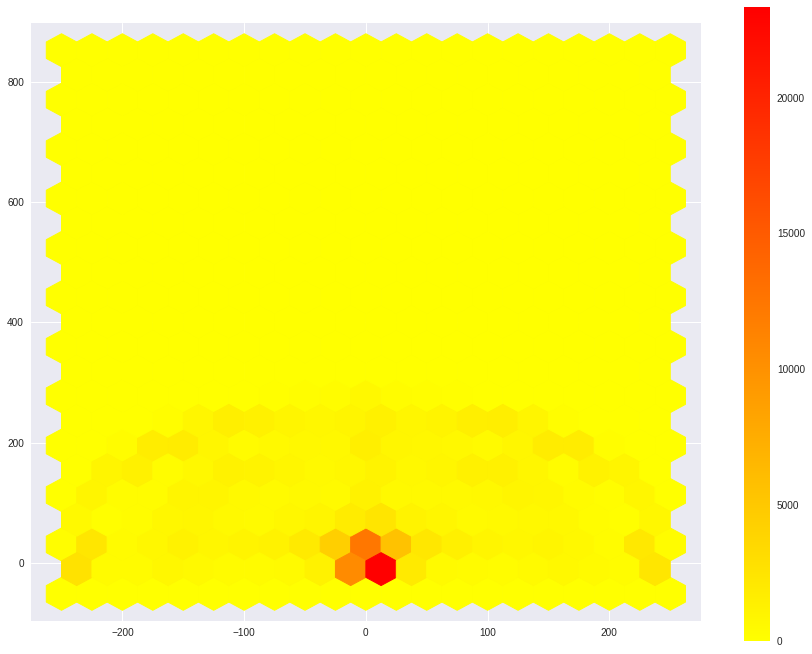

In [58]:
x = shots_df.LOC_X #x coordinates from our shots dataframe
y = shots_df.LOC_Y #y coordinates from our shots dataframe

fig=plt.figure(figsize=(12,11))
image = plt.hexbin(x,y,cmap=plt.cm.autumn_r,gridsize=20)
cbaxes = fig.add_axes([.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(image, cax = cbaxes)
plt.show()

This graph does not look like any sort of basketball court, nor does it look like data that we can interpret. One thing we can do is add the basketball court lines so the data points resemble acutal spots on the basketball court. To see how the basketball court lines are drawn you can read about it [here](http://savvastjortjoglou.com/nba-shot-sharts.html#Drawing-the-Court) (External link with code) or look at the code [here](#court).

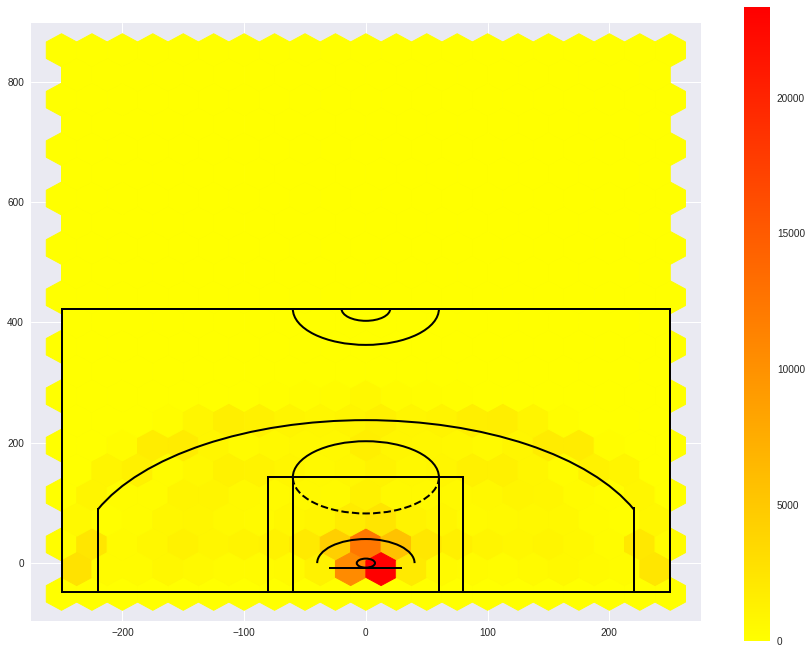

In [44]:
fig=plt.figure(figsize=(12,11))

draw_court(outer_lines=True) #add basketball court lines

image = plt.hexbin(x,y,cmap=plt.cm.autumn_r,gridsize=20)
cbaxes = fig.add_axes([.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(image, cax = cbaxes)
plt.show()

Now we have a yellow basketball court with some red and orange hexagons near the basket. If you have good vision you can also see some faint hexagons aroud the three point line. Obviously we need to do something to make this look better. To get rid of a lot of the yellow spaces, we can set the minimum count (mincnt) to 1. What this is doing is only plotting points where at least one shot was taken. We can also adjust the x and y bounds to make the plot fit to the dimensions of the basketball court.

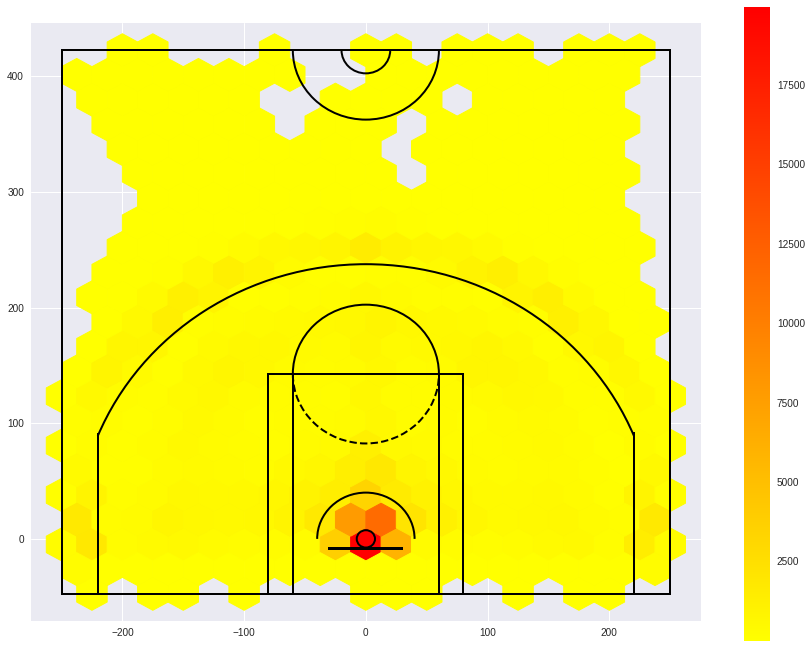

In [45]:
#bounds for x and y axes
xbnds = np.array([-250,250])
ybnds = np.array([-47.5, 422.5])

#parameter for hexbin
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]

fig=plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
image = plt.hexbin(x,y,cmap=plt.cm.autumn_r,gridsize=20,extent=extent,mincnt=1)
cbaxes = fig.add_axes([.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(image, cax = cbaxes)
plt.show()

Now it is starting to look much better. We still need to get the data in a more interpretable manner though. Looking at the right hand side of the plot, there is a bar that indicates what each color on the plot means. In this case, since we are plotting the number of shots, it is indicating how many shots were taken at that location. Since there is such a big difference between shots taken at the basket and shots taken everywhere else, we need to either use some sort of data transformation or to plot something else about our data. We can use a transformation by plotting shooting percentage of each location. This is actually pretty easy to calculate since we can take advantage of the hexbin parameters _C_ and _reduce_\__C_\__function_. To read about these two parameters please see the [documentation](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.hexbin.html).

Since our newly loaded dataframe (shots_df) already contains a boolean field for the result of a shot, we can pass that into the _C_ paramter. Logically, a 1 means the shot went in and a 0 means the shot didn't go in. Then, we can use the numpy mean function to reduce the array of each bin and this will give us the percentage of shots made. One last thing we are going to change is the mincnt again. We are going to set it to 10 so we make sure that we are plotting shot locations that have a fair number of samples.

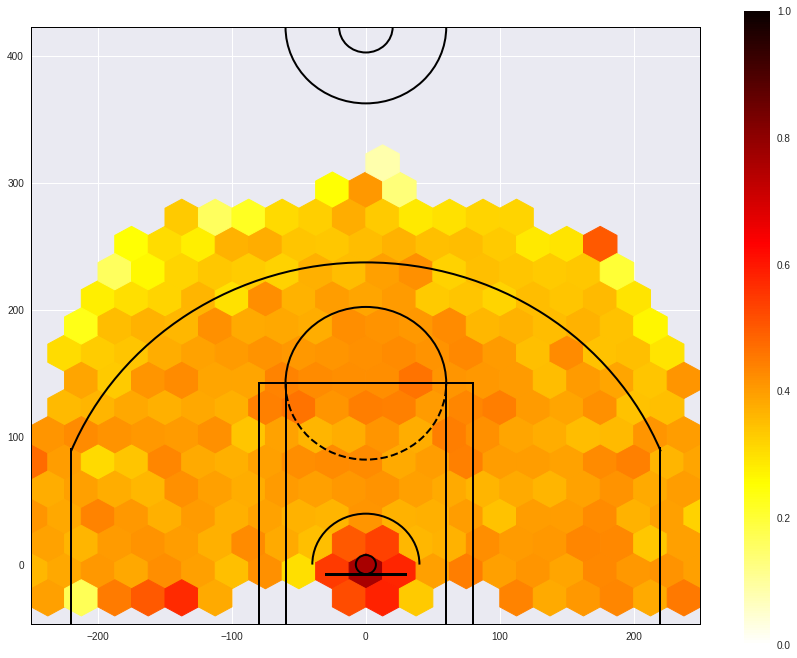

In [52]:
xbnds = np.array([-250,250])
ybnds = np.array([-47.5, 422.5])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]
fig=plt.figure(figsize=(12,11))
ax = fig.add_subplot(111)
draw_court(outer_lines=True)
x = shots_df.LOC_X
y = shots_df.LOC_Y
image = plt.hexbin(x,y,C=shots_df.SHOT_MADE_FLAG,reduce_C_function=np.mean,cmap=plt.cm.hot_r,gridsize=20,extent=extent,mincnt=10)
ax.set_xlim(xbnds)
ax.set_ylim(ybnds)
cbaxes = fig.add_axes([.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(image, cax = cbaxes)
plt.clim(0,1)
plt.show()

In [49]:
eog = shots_df[(shots_df['PERIOD'] == 4) & (shots_df['MINUTES_REMAINING'] < 2) & (shots_df['SHOT_DISTANCE'] > 18)]
rog = shots_df[(shots_df['PERIOD'] != 4) & (shots_df['MINUTES_REMAINING'] > 2) & (shots_df['SHOT_DISTANCE'] > 18)]

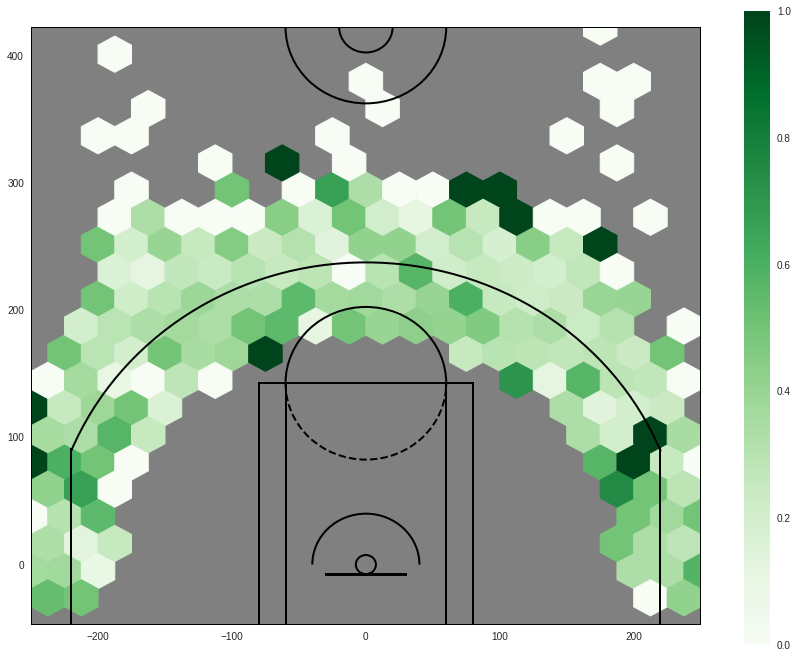

In [59]:
xbnds = np.array([-250,250])
ybnds = np.array([-47.5, 422.5])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]
fig=plt.figure(figsize=(12,11))
ax = fig.add_subplot(111)
draw_court(outer_lines=True)
x = eog.LOC_X
y = eog.LOC_Y
# Set gridsize just to make them visually large
image = plt.hexbin(x,y,C=eog.SHOT_MADE_FLAG,cmap=plt.cm.Greens,gridsize=20,extent=extent)
ax.set_xlim(xbnds)
ax.set_ylim(ybnds)
cbaxes = fig.add_axes([.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(image, cax = cbaxes)
ax.set_facecolor('gray')
ax.grid(False)
plt.clim(0,1)
plt.show()

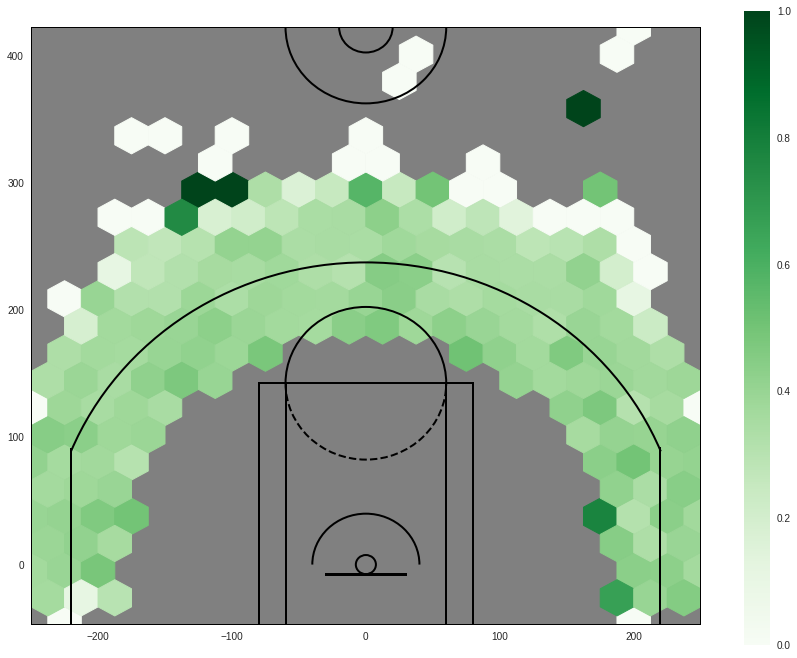

In [60]:
xbnds = np.array([-250,250])
ybnds = np.array([-47.5, 422.5])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]
fig=plt.figure(figsize=(12,11))
ax = fig.add_subplot(111)
draw_court(outer_lines=True)
x = rog.LOC_X
y = rog.LOC_Y
# Set gridsize just to make them visually large
image = plt.hexbin(x,y,C=rog.SHOT_MADE_FLAG,cmap=plt.cm.Greens,gridsize=20,extent=extent)
ax.set_xlim(xbnds)
ax.set_ylim(ybnds)
cbaxes = fig.add_axes([.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(image, cax = cbaxes)
plt.clim(0,1)
ax.set_facecolor('gray')
ax.grid(False)
plt.show()

In [103]:
eog_samp = eog.SHOT_MADE_FLAG.sample(1000)
rog_samp = rog.SHOT_MADE_FLAG.sample(10000)
print(eog_samp.mean())
print(rog_samp.mean())
tval, pval = stats.ttest_ind(eog_samp,rog_samp)
print('The test statistic is: %f. The p-value is: %f' %(tval, pval))

0.299
0.3816
The test statistic is: -5.152566. The p-value is: 0.000000


In [17]:
#inputs
shots_df.SHOT_RESULT = shots_df.SHOT_RESULT.map(dict(made=1, missed=0))
shots_df.SHOT_RESULT.head()

0    1
1    0
2    0
3    0
4    0
Name: SHOT_RESULT, dtype: int64

In [105]:
from sklearn.preprocessing import MinMaxScaler
X = shots_df[['PERIOD', 'SHOT_CLOCK', 'seconds', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST']]
Y = shots_df['SHOT_RESULT']
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

In [109]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
X = curry[['PERIOD', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']]
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, test_size=0.33, random_state=42)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 2), random_state=1)
clf.fit(X_train, y_train)
#clf = RandomForestClassifier(max_depth=2, random_state=1)
#clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [110]:
result = clf.predict(X_test)

In [111]:
count = 0
y_test = y_test.tolist()
for x in range(0, len(result)):
    if result[x] == y_test[x]:
        count += 1
print(count/len(result))

0.6072687693727374


In [ ]:
#hypthesis testing
#compare shooting percentages between game clock under 1 min in 4th quarter and rest of game


<a id='court'></a>

In [35]:
#this was used from http://savvastjortjoglou.com/nba-shot-sharts.html
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 139, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

## Appendix